In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from sklearn import cluster, datasets, mixture
from sklearn.metrics import silhouette_score, silhouette_samples
from unsupervised.clustering import KMeansP  
from unsupervised.clustering import KMedoidsP 
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
#from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean

# 1. Research about the Spectral Clustering method, and answer the following questions:

### a. In which cases might it be more useful to apply?

**Spectral Clustering Use Cases:**

1. **Non-Linearly Separable Data:**
   - Spectral clustering is beneficial when dealing with data that doesn't form clear, simple groups separable by straight lines. It can handle more complex shapes and structures.

2. **Graph-Based Structures:**
   - If your data can be represented as a network or graph (e.g., social networks or image segmentation), spectral clustering takes advantage of connections to identify clusters.

3. **Unequal Cluster Sizes:**
   - When clusters have different sizes, spectral clustering is more flexible in identifying clusters of various sizes compared to some other methods.

4. **Low-Dimensional Embeddings:**
   - Spectral clustering is useful when you want to reduce the dimensionality of your data before clustering, finding a lower-dimensional representation capturing important relationships.

5. **Image Segmentation:**
   - In computer vision, spectral clustering is often used for image segmentation, helping identify different regions or objects based on similarities in color or intensity.

6. **Natural Clusters:**
   - Spectral clustering is effective when clusters in your data exhibit a natural spectral structure, showcasing patterns in how they are connected.



### b. What are the mathematical fundamentals of it?

**Mathematical Fundamentals of Spectral Clustering:**

Spectral clustering's strength lies in capturing non-linear relationships and identifying clusters with complex shapes by leveraging the spectral properties of the graph Laplacian. Understanding linear algebra, graph theory, and eigenvalue decomposition is crucial for grasping the mathematical foundations of spectral clustering.

1. **Affinity Matrix:**
   - Spectral clustering begins with an affinity matrix, representing similarities between data points. This matrix is constructed based on pairwise similarities, such as distances or feature space similarities.

2. **Graph Representation:**
   - The affinity matrix is used to build a weighted graph, where nodes represent data points, and edge weights indicate the strength of connections. Common approaches include using a k-nearest neighbors graph or a fully connected graph.

3. **Graph Laplacian:**
   - Compute the Laplacian matrix of the graph. Different forms exist, such as the unnormalized Laplacian, normalized Laplacian, and random walk Laplacian. The choice depends on the specific application.

4. **Eigenvalue Decomposition:**
   - Find the eigenvectors and eigenvalues of the Laplacian matrix. These eigenvectors form a new set of basis vectors that reveal the underlying structure of the data.










### c. What is the algorithm to compute it?

**Spectral Clustering Algorithm:**

1. **Input:**
   - Given a dataset with \(n\) data points.

2. **Affinity Matrix:**
   - Construct the affinity matrix \(W\) based on pairwise similarities between data points. Common choices include using a Gaussian kernel to measure similarity.

3. **Degree Matrix:**
   - Compute the degree matrix \(D\), where \(D_{ii}\) is the sum of the weights in the \(i\)-th row (or column) of the affinity matrix \(W\).

4. **Graph Laplacian:**
   - Compute the unnormalized Laplacian matrix \(L = D - W\). Alternatively, compute the normalized Laplacian \(L_{\text{norm}} = I - D^{-1/2}WD^{-1/2}\) or the random walk Laplacian \(L_{\text{rw}} = I - D^{-1}W\).

5. **Eigenvalue Decomposition:**
   - Perform eigenvalue decomposition on the Laplacian matrix to obtain eigenvalues \(\lambda_1, \lambda_2, \ldots, \lambda_n\) and corresponding eigenvectors \(v_1, v_2, \ldots, v_n\).

6. **Dimensionality Reduction:**
   - Select the \(k\) smallest eigenvalues (excluding the first one) and their corresponding eigenvectors to form a matrix \(V_k\). This step reduces the dimensionality of the data.

7. **Clustering in Reduced Space:**
   - Cluster the rows of \(V_k\) using a standard clustering algorithm like k-means. The number of clusters is often determined by examining the eigengap or other criteria.

8. **Assigning Labels:**
   - Map the cluster assignments obtained in the reduced space back to the original data points.



### d. Does it hold any relation to some of the concepts previously mentioned in class? Which, and how?

these techniques are interconnected through the broader concepts of linear algebra, dimensionality reduction, and clustering. Spectral clustering leverages spectral decomposition, and its results can be influenced by the choice of dimensionality reduction techniques, such as PCA or t-SNE. Singular Value Decomposition is a foundational concept in linear algebra that underlies both spectral decomposition and PCA. K-means is often used in conjunction with spectral clustering, where spectral clustering provides a suitable representation for K-means clustering.

# 2. Research about the DBSCAN method, and answer the following questions:

### a. In which cases might it be more useful to apply?

- **Unknown Cluster Count:** When the number of clusters is not known in advance.
- **Arbitrary Cluster Shapes:** Effective for clusters with non-linear and arbitrary shapes.
- **Varying Cluster Densities:** Well-suited for datasets with clusters of different densities.
- **Handling Noise and Outliers:** Capable of identifying and excluding noise points as outliers.

### b. What are the mathematical fundamentals of it?

- **Density Definition:** Clusters are formed based on density, considering the number of points within a specified distance.
- **Core Points and Neighborhoods:** Core points have a minimum number of neighbors within the defined distance.
- **Reachability:** Points are connected if they are within each other's neighborhoods.
- **Parameters:** Defined by Epsilon (\(\varepsilon\)) for neighborhood distance and MinPoints for core point definition.

### c. Is there any relation between DBSCAN and Spectral Clustering? If so, what is it?


- **Density and Connectivity:**
  - Both algorithms focus on the density and connectivity of data points. DBSCAN identifies dense regions based on local point density, while Spectral Clustering leverages spectral properties of a graph to capture connectivity.

- **Handling Arbitrary Shapes:**
  - Both algorithms are capable of discovering clusters with non-linear and arbitrary shapes. Spectral Clustering achieves this by working in a reduced-dimensional space, and DBSCAN identifies clusters based on local density regardless of shape.

- **Parameter Sensitivity:**
  - Both algorithms have parameters that need to be carefully chosen. DBSCAN relies on parameters like Epsilon (\(\varepsilon\)) and MinPoints, while Spectral Clustering involves parameter choices related to the construction of the affinity matrix and the number of clusters.

- **Complementary Use:**
  - In practice, DBSCAN may be used to preprocess data and identify clusters with varying densities, and then Spectral Clustering can be applied to analyze the internal structures of these clusters in more detail.


# 3. What is the elbow method in clustering? And which flaws does it pose to assess quality?

**Steps:**
1. Run the clustering algorithm with various values of k.
2. Compute the sum of squared distances for each k.
3. Plot the sum of squared distances against the number of clusters.
4. Identify the "elbow" point.

see this picture [Picture](https://media.licdn.com/dms/image/D4D12AQF-yYtbzPvNFg/article-cover_image-shrink_600_2000/0/1682277078758?e=2147483647&v=beta&t=VhzheKDjy7bEcsYyrjql3NQAUcTaMBCTzhZWSVVSeNg)

**The elbow method**, while widely used for determining the optimal number of clusters in clustering algorithms like K-means, has several flaws and limitations. Firstly, the identification of the "_elbow_" point in the plot is somewhat subjective and relies on visual interpretation. Additionally, its effectiveness is influenced by the data distribution, making it less suitable for datasets with varying cluster sizes, densities, or irregular shapes. The method is sensitive to feature scaling, and clusters with significantly different sizes may not be accurately captured. Moreover, for datasets with non-convex clusters, the elbow method might not effectively discern the underlying structure, and its assumption of homogeneous cluster sizes can lead to suboptimal results in cases where this assumption is violated. Despite its quick and intuitive nature, these limitations highlight the need for cautious interpretation and consideration of alternative methods in cluster analysis.


# 4. Remember the unsupervised Python package you created in the previous unit? 😀It’s time for an upgrade.

### Done ✅

# 5. Let’s use the newly created modules in unsupervised to cluster some toy data.

### a. Use the following code snippet to create scattered data X

In [2]:
X, y = make_blobs(
n_samples=500,
n_features=2,
centers=4,
cluster_std=1,
center_box=(-10.0, 10.0),
shuffle=True,
random_state=1,
)

### b. Plot the resulting dataset. How many clusters are there? How far are they from one another?

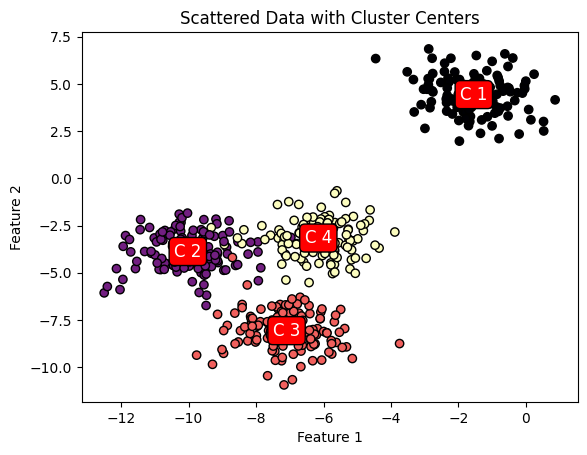

In [3]:
# Plot the resulting dataset with cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='magma', edgecolors='k')

# Plot cluster centers and label them with custom style and colors
centers = []
for i in range(4):  # Assuming 4 clusters
    cluster_points = X[y == i]
    cluster_center = np.mean(cluster_points, axis=0)
    centers.append(cluster_center)
    plt.text(cluster_center[0], cluster_center[1], f'C {i + 1}', 
             fontsize=12, ha='center', va='center', color='white', 
             bbox=dict(facecolor='red', edgecolor='black', boxstyle='round,pad=0.3'))

plt.title("Scattered Data with Cluster Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [4]:
# Centers of Cluster 1 and Cluster 4
center_cluster1 = centers[0]
center_cluster4 = centers[3]

# Calculate the Euclidean distance
distance = euclidean(center_cluster1, center_cluster4)

print(f"The distance between Cluster 1 and Cluster 4 is: {distance:.2f}")

The distance between Cluster 1 and Cluster 4 is: 8.89


In [5]:
# Assuming "centers" is the list of cluster centers
center_c2 = centers[1]
center_c3 = centers[2]
center_c4 = centers[3]

# Calculate the distance between C2 and C3
distance_c2_c3 = euclidean(center_c2, center_c3)

# Calculate the distance between C2 and C4
distance_c2_c4 = euclidean(center_c2, center_c4)

# Calculate the distance between C3 and C4
distance_c3_c4 = euclidean(center_c3, center_c4)

print(f"Distance between C2 and C3: {distance_c2_c3:.2f} units")
print(f"Distance between C2 and C4: {distance_c2_c4:.2f} units")
print(f"Distance between C3 and C4: {distance_c3_c4:.2f} units")

Distance between C2 and C3: 5.11 units
Distance between C2 and C4: 3.94 units
Distance between C3 and C4: 5.00 units


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


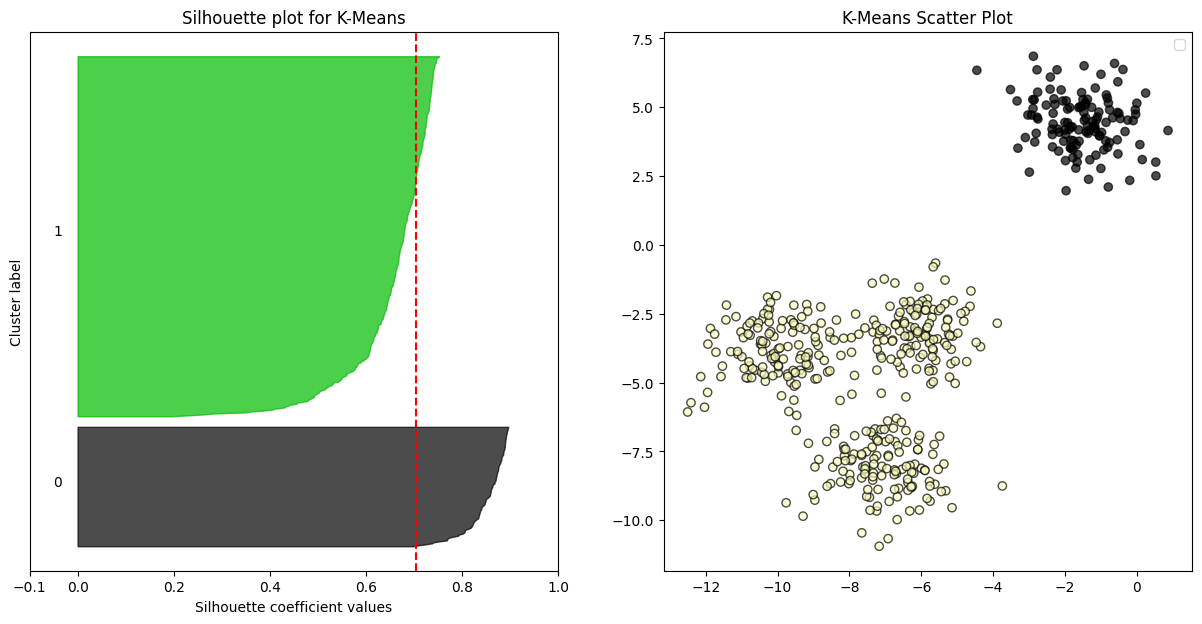

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


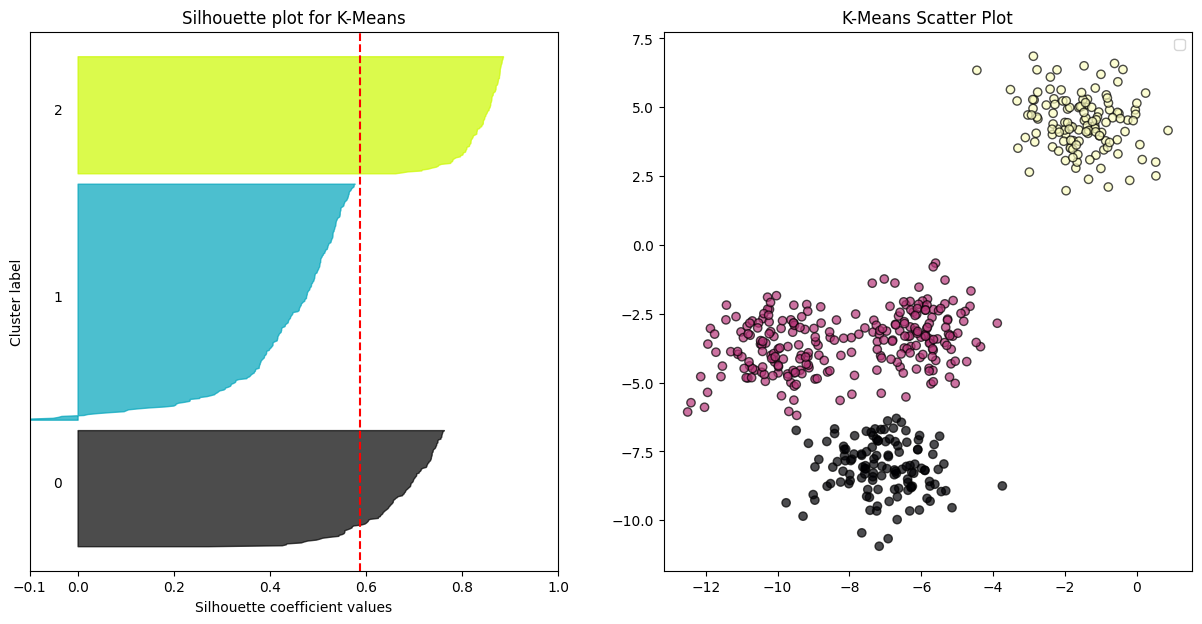

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


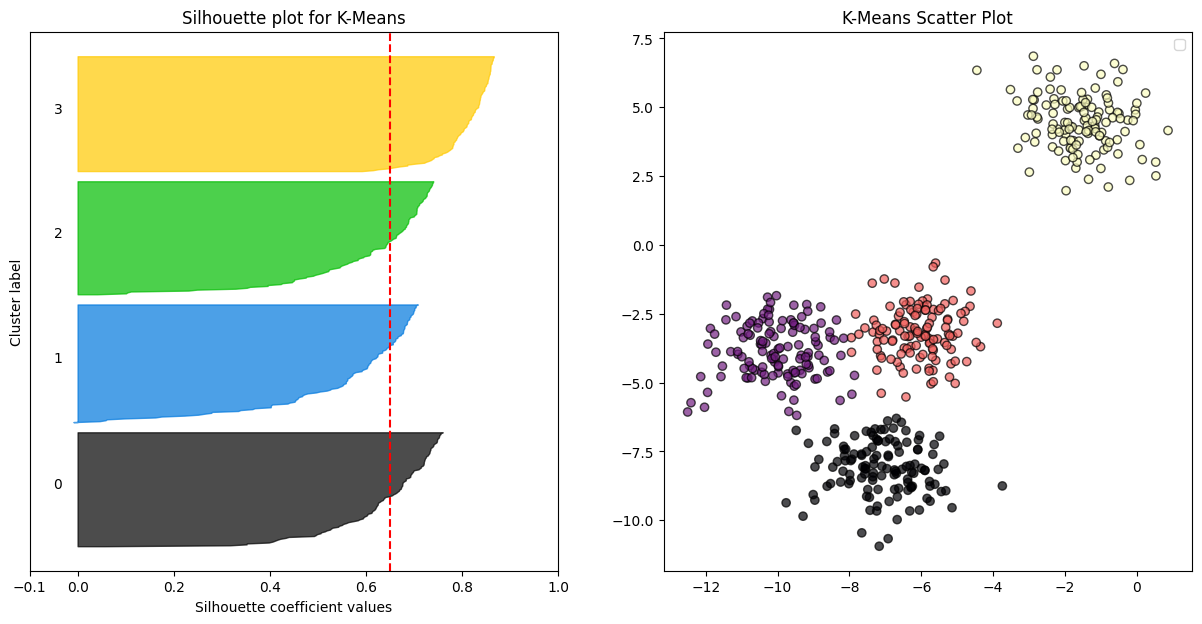

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


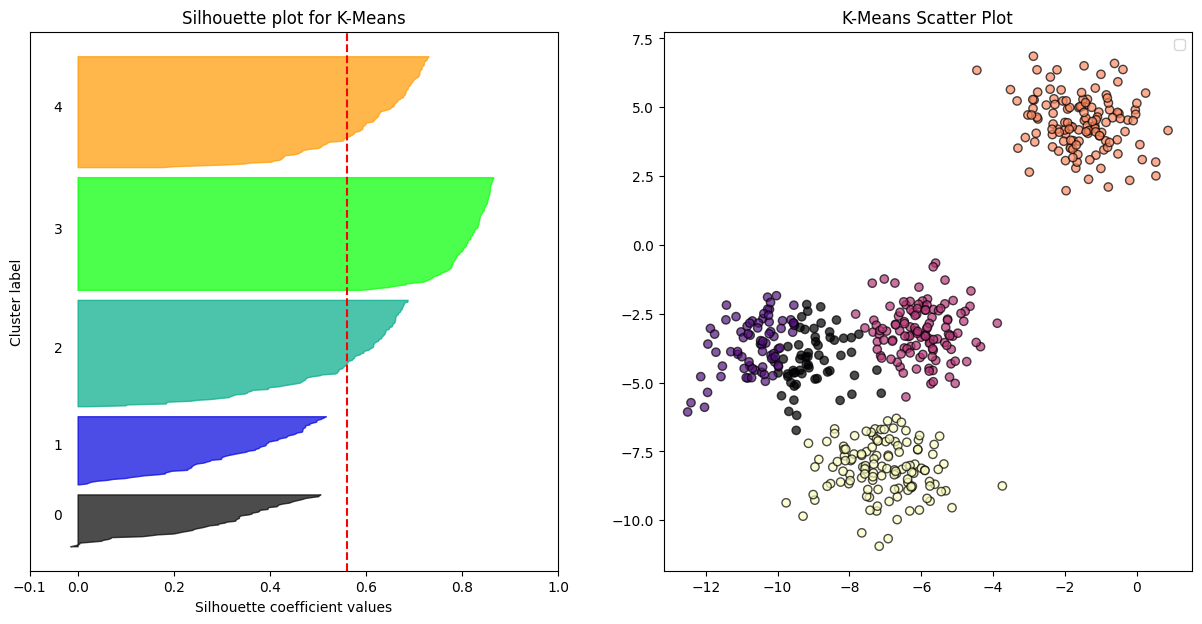

In [6]:
# Iterate over different values of K
for k in range(2, 6):  # K from 2 to 5
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 7)

    # K-Means
    kmeans = KMeansP.KMeans(n_clusters=k)
    kmeans.fit(X)
    kmeans_labels = kmeans.predict(X)

    # Silhouette plot for K-Means
    silhouette_avg_kmeans = silhouette_score(X, kmeans_labels)
    silhouette_values_kmeans = silhouette_samples(X, kmeans_labels)

    y_lower = 10
    for i in range(k):
        cluster_silhouette_values = silhouette_values_kmeans[kmeans_labels == i]
        cluster_silhouette_values.sort()
        size_cluster_i = cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette plot for K-Means")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg_kmeans, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the y-axis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    ax1.set_xlim([-0.1, 1])

    # Scatter plot with centers for K-Means
    ax2.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='magma', edgecolors='k', alpha=0.7)
    #ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
    ax2.set_title("K-Means Scatter Plot")
    ax2.legend()

    plt.show()


TypeError: 'NoneType' object is not iterable

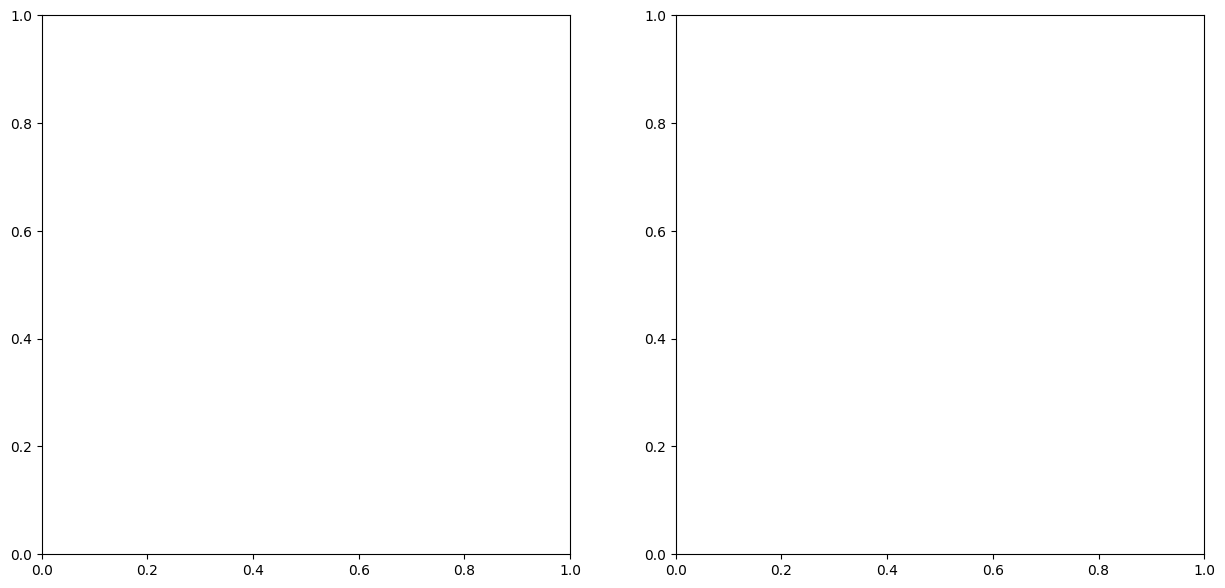

In [7]:
# Iterate over different values of K
for k in range(2, 6):  # K from 2 to 5
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 7)

    # K-Medoids
    kmedoids = KMedoidsP.KMedoids(n_clusters=k)
    kmedoids.fit(X)
    kmedoids_labels = kmedoids.predict(X)

    # Silhouette plot for K-Medoids
    silhouette_avg_kmedoids = silhouette_score(X, kmedoids_labels)
    silhouette_values_kmedoids = silhouette_samples(X, kmedoids_labels)

    y_lower = 10
    for i in range(k):
        cluster_silhouette_values = silhouette_values_kmedoids[kmedoids_labels == i]
        cluster_silhouette_values.sort()
        size_cluster_i = cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette plot for K-Medoids")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg_kmedoids, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the y-axis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    ax1.set_xlim([-0.1, 1])

    # Scatter plot with medoids for K-Medoids
    ax2.scatter(X[:, 0], X[:, 1], c=kmedoids_labels, cmap='viridis', edgecolors='k', alpha=0.7)
    #ax2.scatter(X[kmedoids.medoid_indices_, 0], X[kmedoids.medoid_indices_, 1], c='red', marker='X', s=200, label='Medoids')
    ax2.set_title("K-Medoids Scatter Plot")
    ax2.legend()

    plt.show()


### d. What number of K got the best silhouette score? What can you say about the figures? Is this the expected result?

the utilization of silhouette analysis aids in the discernment of an optimal value for n_clusters. The silhouette plot vividly illustrates that selecting n_clusters with values of 3, 5, and 6 proves disadvantageous for the provided data. This is evident through the existence of clusters exhibiting below-average silhouette scores and the considerable fluctuations in the size of the silhouette plots. The silhouette analysis, while somewhat inconclusive, tends to favor either 2 or 4 as potential candidates for the optimal number of clusters.

Furthermore, the thickness of the silhouette plot provides insight into the size of the clusters. Notably, when n_clusters equals 2, the silhouette plot for cluster 0 appears more extensive, indicative of the amalgamation of the three sub-clusters into a single larger cluster. Conversely, when n_clusters is set to 4, all plots exhibit a comparable thickness, suggesting uniform sizes. This observation is corroborated by the labeled scatter plot on the right, reinforcing the notion that 4 may indeed be a favorable choice for the number of clusters.

# 6. Use the following code snippet to create different types of scattered data:

In [ ]:
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropically distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
# blobs with varied variances
varied = datasets.make_blobs(
n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

### a. Plot the different datasets in separate figures. What can you say about them?

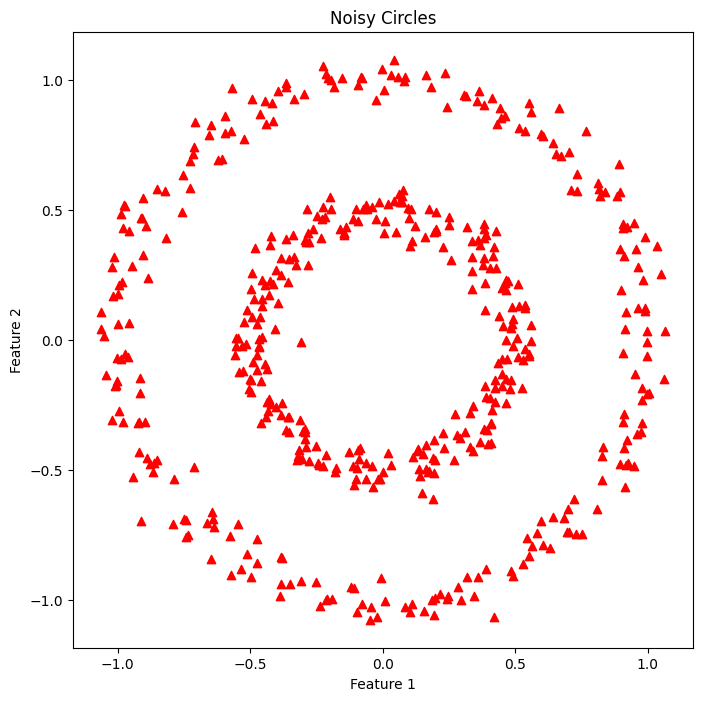

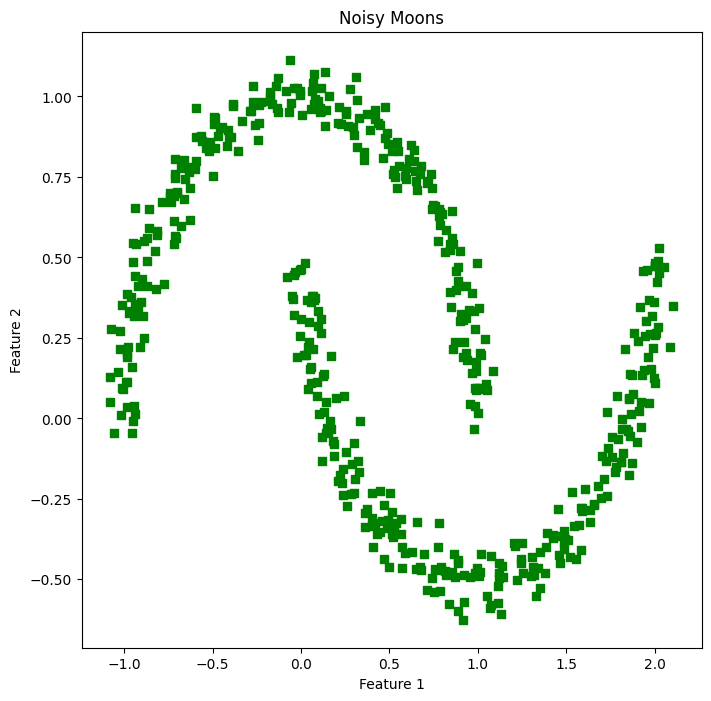

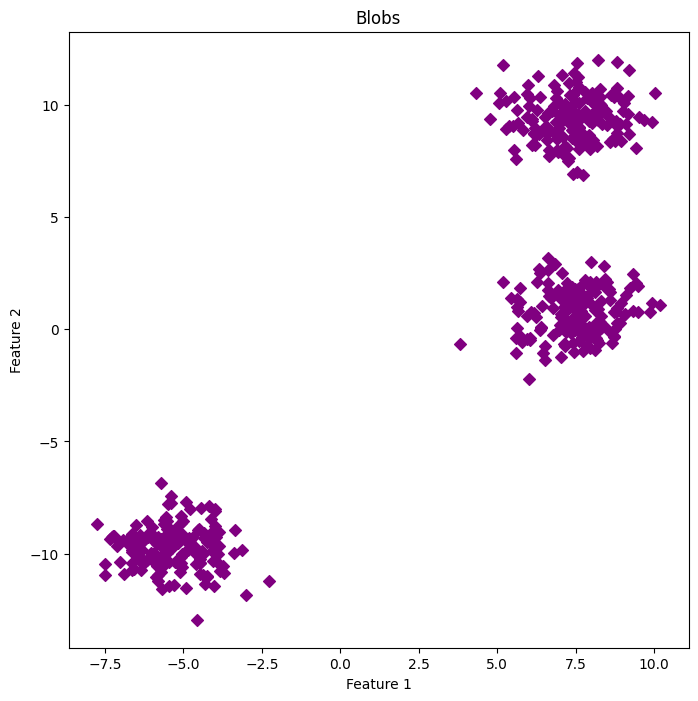

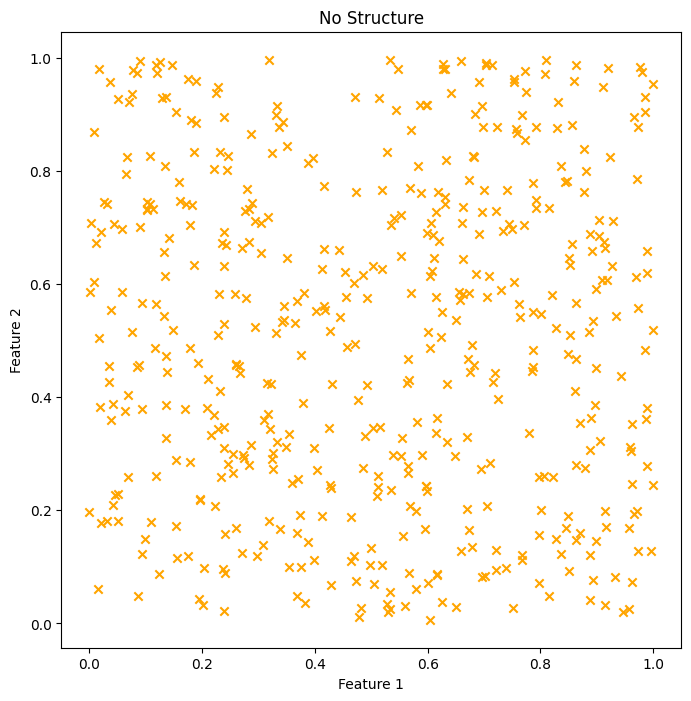

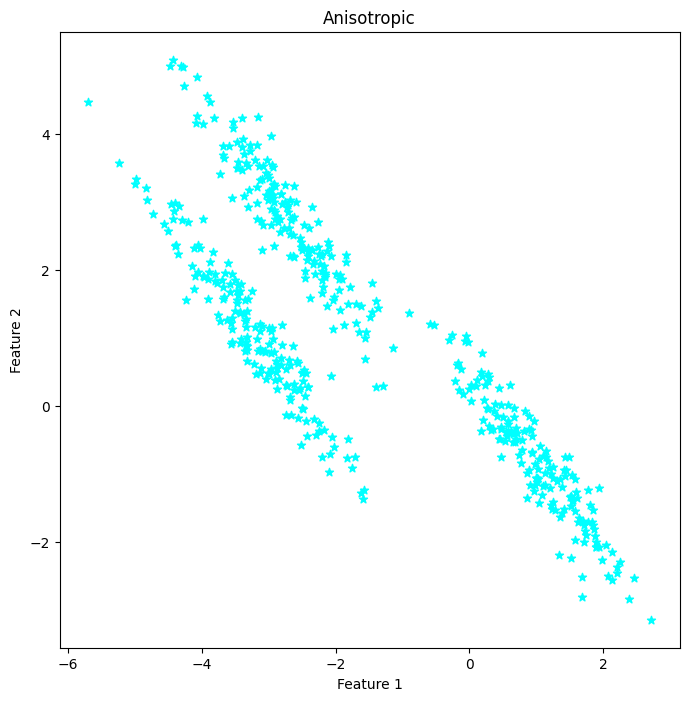

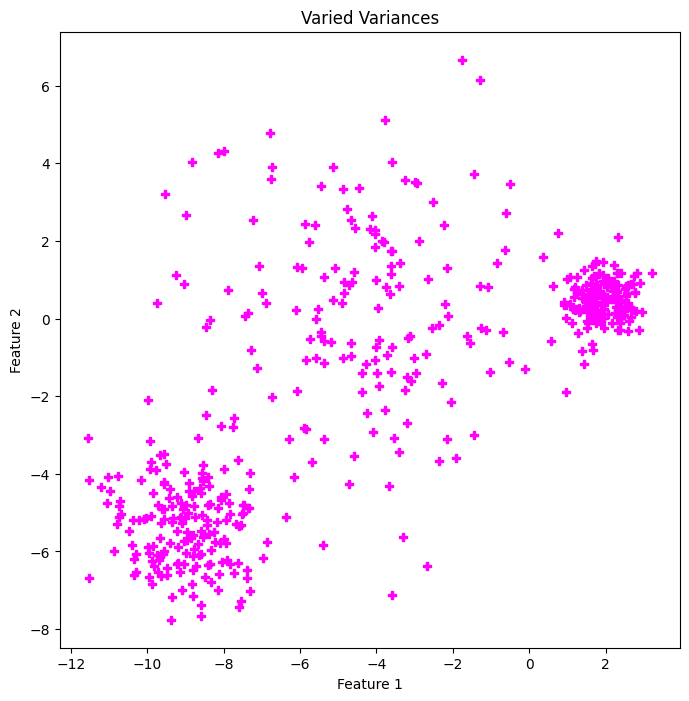

In [ ]:
# Function to plot datasets
def plot_dataset(X, title, color='blue', marker='o'):
    plt.figure(figsize=(8, 8))
    plt.scatter(X[:, 0], X[:, 1], color=color, marker=marker)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot each dataset with different colors and styles
plot_dataset(noisy_circles[0], title='Noisy Circles', color='red', marker='^')
plot_dataset(noisy_moons[0], title='Noisy Moons', color='green', marker='s')
plot_dataset(blobs[0], title='Blobs', color='purple', marker='D')
plot_dataset(no_structure[0], title='No Structure', color='orange', marker='x')
plot_dataset(aniso[0], title='Anisotropic', color='cyan', marker='*')
plot_dataset(varied[0], title='Varied Variances', color='magenta', marker='P')


### b. Apply k-means, k-medoids, DBSCAN and Spectral Clustering from Scikit-Learn over each dataset and compare the results of each algorithm with respect to each dataset.

In [9]:
# Function to apply clustering algorithms and plot results
def apply_and_plot_clustering(X, algorithms, algorithm_names, dataset_name):
    plt.figure(figsize=(15, 5))
    
    for i, algorithm in enumerate(algorithms):
        # Apply clustering algorithm
        labels = algorithm.fit_predict(X)
        
        # Plot results
        plt.subplot(1, len(algorithms), i + 1)
        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
        plt.title(f'{algorithm_names[i]} - {dataset_name}')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
    
    plt.tight_layout()
    plt.show()

# Apply and plot clustering for each dataset
datasets = [
    noisy_circles[0],
    noisy_moons[0],
    blobs[0],
    no_structure[0],
    aniso[0],
    varied[0]
]

dataset_names = [
    'Noisy Circles',
    'Noisy Moons',
    'Blobs',
    'No Structure',
    'Anisotropic',
    'Varied Variances'
]

# List of clustering algorithms
algorithms = [
    KMeans(n_clusters=2),
    KMedoids(n_clusters=2),
    DBSCAN(eps=0.3, min_samples=5),
    SpectralClustering(n_clusters=2, affinity='nearest_neighbors')
]

algorithm_names = [
    'K-Means',
    'K-Medoids',
    'DBSCAN',
    'Spectral Clustering'
]

# Apply and plot clustering for each dataset
for i in range(len(datasets)):
    X = StandardScaler().fit_transform(datasets[i])
    apply_and_plot_clustering(X, algorithms, algorithm_names, dataset_names[i])

NameError: name 'noisy_circles' is not defined